<a href="https://colab.research.google.com/github/kohtetap/Basic_python/blob/main/Regression/Lab1_grad_des.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#importing required library and package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math

#importing data
df=pd.read_csv('/content/sample_data/Advertising.csv', index_col = 0)

#inquiring dataset
print(df.columns)
print(df.head())
print(df.info())

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')
      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB
None


In [109]:
# setting feature 'radio'  and target 'sales
sel_program = 'newspaper'
X=df[[sel_program]]
Y=df['sales']

# standardizing data by substracting mean and divided by std
Y=np.array((Y-Y.mean())/Y.std())
#X = np.array((X-X.mean())/X.std())
X=X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0) #if feature is more than one column, this code is more covinient

In [110]:
def initialize(dim):
    '''initializing theta and b
    dim is how many feature column '''
    b=random.random()
    theta=np.random.rand(dim)
    return b,theta

In [111]:
def predict_Y(b,theta,X):
    ''' predicting y using theta and b, return y_hat'''
    return b + np.dot(X,theta)

In [112]:
def get_cost(Y,Y_hat):
    ''' calculating sum of residual squared '''
    Y_resd=Y-Y_hat
    return np.sum(Y_resd**2)/len(Y)
    #return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y)

In [113]:
def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
    '''updating theta and b '''
    #calculating derivative of theta and b
    db = (np.sum(y - y_hat)*(-2))/len(y)
    dw = (np.dot((y-y_hat),x)*(-2))/len(y)

    #db=(np.sum(y_hat-y)*2)/len(y)
    #dw=(np.dot((y_hat-y),x)*2)/len(y)

    #updating theta and b using learning_rate which is hyperparameter
    b_1=b_0-learning_rate*db
    theta_1=theta_o-learning_rate*dw

    return b_1,theta_1

In [114]:
def run_gradient_descent(X,Y,alpha,num_iterations):
    # setting error difference to stop iteration
    tolerance = 0.000001

    #initializing b and theta using number of column in X
    b,theta=initialize(X.shape[1])

    # creating dataframe for iteration, b, theta and cost
    gd_iterations_df=pd.DataFrame(columns=['iteration','value_b', 'value_weight', 'cost'])
    result_idx=0
    prev_cost =0

    for iter_num in range(num_iterations):
        # predicting y_hat
        Y_hat=predict_Y(b,theta,X)

        # calculating error
        this_cost=get_cost(Y,Y_hat)

        # setting old b and theta
        prev_b=b
        prev_theta=theta

        # updating b and theta using old b and theta
        b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)

        # inserting data in iteration dataframe
        gd_iterations_df.loc[result_idx]=[iter_num,b, theta[0], this_cost]

        # index for next row
        result_idx=result_idx+1

        # checking error(cost) difference to stop the iterations
        if (np.abs(this_cost  - prev_cost )<= tolerance):
            break

        # updating error(cost)
        prev_cost = this_cost
    return gd_iterations_df,b,theta

# hyperparameter learning rate is alpha, 400 times iterations
gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.01,num_iterations=400)

print(gd_iterations_df)

     iteration   value_b  value_weight      cost
0          0.0  0.345765      0.391224  1.095118
1          1.0  0.338849      0.387982  1.089105
2          2.0  0.332072      0.384804  1.083330
3          3.0  0.325431      0.381689  1.077783
4          4.0  0.318922      0.378637  1.072456
..         ...       ...           ...       ...
213      213.0  0.004677      0.230551  0.943168
214      214.0  0.004583      0.230506  0.943167
215      215.0  0.004491      0.230462  0.943166
216      216.0  0.004402      0.230419  0.943165
217      217.0  0.004314      0.230377  0.943164

[218 rows x 4 columns]


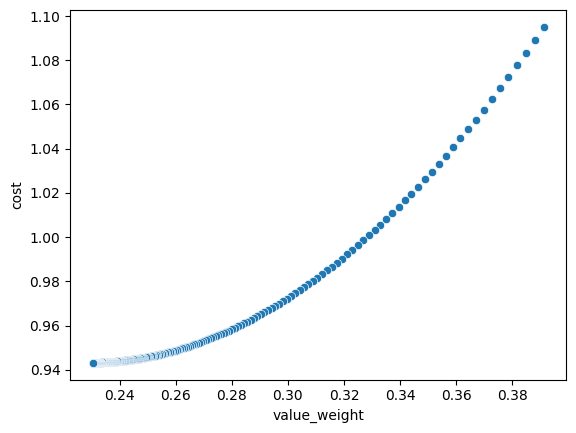

In [115]:
sns.scatterplot(data=gd_iterations_df, x="value_weight", y="cost")
plt.show()

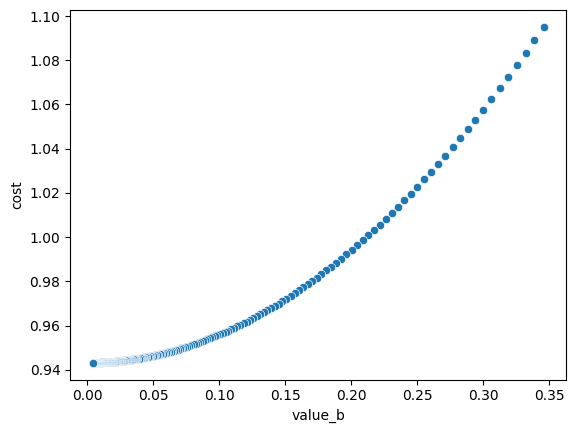

In [116]:
sns.scatterplot(data = gd_iterations_df, x = 'value_b', y= 'cost')
plt.show()

In [117]:
# finding index for minimum value of cost for best parameter
idx = gd_iterations_df['cost'].argmin()

best_parameters = gd_iterations_df.loc[idx, ['value_b', 'value_weight']]
print(best_parameters)


value_b         0.004314
value_weight    0.230377
Name: 217, dtype: float64


In [118]:
# setting x for actual value since is X has standardize value
x = df[sel_program]
y = df['sales']
y_ini = gd_iterations_df.loc[0, 'value_b'] + gd_iterations_df.loc[0, 'value_weight']*x
y_best = gd_iterations_df.loc[idx, 'value_b'] + gd_iterations_df.loc[idx, 'value_weight']*x

In [119]:
y_p = gd_iterations_df.loc[idx, 'value_b'] + gd_iterations_df.loc[idx, 'value_weight'] * X  # predicted y for standardized value

abs_error = np.sum(np.abs(Y - y_p[sel_program])) / len(Y) # Y is standradized actual data
print(sel_program, abs_error, get_cost(Y, y_p[sel_program]))

print(np.sum(((np.abs(Y - y_p[sel_program])) > 0.5)))# standardized difference


newspaper 0.7951050967128104 0.9431630606554111
126


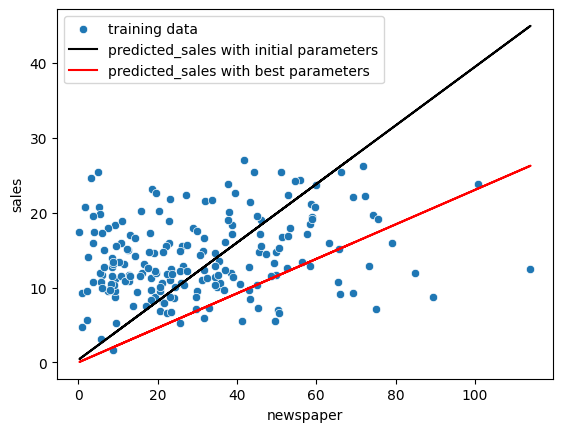

In [121]:
sns.scatterplot(data=df, x=sel_program, y="sales")
plt.plot( x,  y_ini, 'k', x, y_best, 'r')
plt.legend(['training data', 'predicted_sales with initial parameters',
            'predicted_sales with best parameters'])
plt.show()